<a href="https://colab.research.google.com/github/rafikiels/Related-Projects/blob/main/Copy_of_scotch_nlp_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BA820 - Unsupervised Machine Learning
## Scotch NLP Group Project
### Team A3
Aditya Sinha, Rochel Chan, Weijia Suo, Rafikiel Seyvunde, Alexander von Schwerdtner

# Setup

In [ ]:
! pip install umap-learn -q
! pip install category_encoders -q

In [ ]:
# imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# reading dataset into the environment
scotch_dataset = pd.read_csv("https://raw.githubusercontent.com/aditya248/scotch-review-nlp/main/scotch_review2020.csv")
scotch_dataset.sample(3)

,id,name,category,review.point,price,currency,description.1.2247.
957,958,"Wemyss Malts Kiln Embers, 46%",Blended Malt Scotch Whisky,89,64,$,If I had to back one of the protagonists in Do...
554,555,Blackadder 11 year old Raw Cask Balmenach 2008...,Single Malt Scotch,91,165,$,Two parcels of single malt of differing ages f...
700,701,"Laphroaig 32 year old, 46.5%",Single Malt Scotch,90,"1,500",$,"Light gold. A beautiful oxidized note, with so..."


## Data Cleaning

In [ ]:
scotch_dataset.shape

(2247, 7)

In [ ]:
scotch_dataset.columns

Index(['id', 'name', 'category', 'review.point', 'price', 'currency',
       'description.1.2247.'],
      dtype='object')

In [ ]:
# check column types
scotch_dataset.dtypes

id                      int64
name                   object
category               object
review.point            int64
price                  object
currency               object
description.1.2247.    object
dtype: object

In [ ]:
scotch_dataset = scotch_dataset.rename(columns={'description.1.2247.': 'review_description'})

In [ ]:
# Clean price column price and change type.
pattern = r'[A-Za-z]'
scotch_dataset[scotch_dataset['price'].str.contains(pattern)]['price']

33      15,000 or $60,000/set
92                 150/375ml.
94                  50/375ml.
186                60,000/set
359                 50/375ml.
739                60,000/set
778                100/375ml.
1010                 44/liter
1280               132/700ml.
1548               60,000/set
1814               60,000/set
1825            39/1.75 liter
2027                 35/liter
2200            18/1.75 liter
Name: price, dtype: object

In [ ]:
scotch_dataset.iloc[33,4] = '15000'
scotch_dataset['price'].replace(',', '', inplace = True, regex = True)
scotch_dataset['price'] = scotch_dataset['price'].map(lambda x: x.split('/')[0])

In [ ]:
scotch_dataset['price'] = scotch_dataset['price'].astype('float')

In [ ]:
# check for duplicates
scotch_dataset.duplicated().sum()

0

In [ ]:
# check for null values
scotch_dataset.isna().sum()

id                     0
name                   0
category               0
review.point           0
price                  0
currency               0
review_description    39
dtype: int64

In [ ]:
# drop 39 null or na values
scotch_dataset.dropna(inplace=True)
scotch_dataset.isna().sum()

id                    0
name                  0
category              0
review.point          0
price                 0
currency              0
review_description    0
dtype: int64

In [ ]:
scotch_dataset[scotch_dataset['name'].duplicated() == True]

,id,name,category,review.point,price,currency,review_description
108,109,"Benriach The Smoky Twelve, 46%",Single Malt Scotch,94,65.0,$,\r\n\r\nLet this whisky glide into your glass ...
192,193,"Laphroaig Triple Wood, 48%",Single Malt Scotch,93,70.0,$,Aged in a European oak oloroso sherry hogshead...
199,200,Laphroaig 10 year old Cask Strength (Batch 010...,Single Malt Scotch,93,70.0,$,"Initially matured in bourbon barrels, then tra..."
202,203,"Compass Box Spice Tree Extravaganza, 46%",Blended Malt Scotch Whisky,93,140.0,$,"The nose offers canned peach halves in syrup, ..."
215,216,"Glenlivet Enigma, 60.6%",Single Malt Scotch,93,149.0,$,This presents a mellow bouquet of rich dried f...
217,218,Aberlour A’bunadh Alba Cask Strength (Batch #0...,Single Malt Scotch,93,90.0,$,"The yin to Aberlour A’bunadh’s yang, this cask..."
231,232,"Compass Box The Peat Monster, 46%",Blended Malt Scotch Whisky,93,65.0,$,An exceptional blend from first-fill American ...
232,233,Aberfeldy 18 year old French Red Wine Cask-Fin...,Single Malt Scotch,93,120.0,$,"Perfumed on the nose, with fresh-cut flowers, ..."
315,316,"Tamdhu Batch Strength (#002), 58.5%",Single Malt Scotch,92,90.0,$,"It rarely gets better than this. Vanilla, almo..."
324,325,"Longrow 18 year old, 46%",Single Malt Scotch,92,220.0,$,This 42 year old expression was matured in a s...


In [ ]:
# check for duplicate name
scotch_dataset['name'].duplicated().sum()

57

In [ ]:
# Merge duplicate name with joing the review and taking mean for other columns.
scotch_dataset['review.point'] = scotch_dataset.groupby('name')['review.point'].transform('mean')
scotch_dataset['price'] = scotch_dataset.groupby('name')['price'].transform('mean')
scotch_dataset['review_description'] = scotch_dataset.groupby('name')['review_description'].transform(lambda x: ','.join(x))

In [ ]:
# Drop the duplicate columns (keep the first each time)
scotch_dataset.drop_duplicates(subset=['name'], keep='first', inplace=True)

In [ ]:
# Extract new features
scotch_dataset['alcohol'] = scotch_dataset['name'].str.extract(r"([\(\,\,\'\"\’\”\$] ? ?\d+(\.\d+)?%)")[0]
scotch_dataset['alcohol'] = scotch_dataset['alcohol'].str.replace("[^\d\.]", "").astype(float)

In [ ]:
scotch_dataset['alcohol']

0       40.5
1       42.9
2       40.0
3       50.8
4       45.4
        ... 
2242    46.0
2243     NaN
2244    50.0
2245    40.0
2246    55.3
Name: alcohol, Length: 2151, dtype: float64

In [ ]:
scotch_dataset['alcohol'].isna().sum()

10

In [ ]:
scotch_dataset['alcohol'] = scotch_dataset['alcohol'].fillna(scotch_dataset['alcohol'].mean())

In [ ]:
scotch_dataset.isna().sum()

id                    0
name                  0
category              0
review.point          0
price                 0
currency              0
review_description    0
alcohol               0
dtype: int64

In [ ]:
# price per point
scotch_dataset['price_per_point'] = scotch_dataset['price']/scotch_dataset['review.point']
scotch_dataset.head()

,id,name,category,review.point,price,currency,review_description,alcohol,price_per_point
0,1,"Black Bowmore 42 year old 1964 vintage, 40.5%",Single Malt Scotch,97.0,4500.0,$,What impresses me most is how this whisky evol...,40.5,46.391753
1,2,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97.0,13500.0,$,There have been some legendary Bowmores from t...,42.9,139.175258
2,3,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97.0,225.0,$,"Magnificently powerful and intense. Caramels, ...",40.0,2.319588
3,4,"Glenlivet Cellar Collection 1969 vintage, 50.8%",Single Malt Scotch,96.0,750.0,$,It’s great that Glenlivet releases whiskies un...,50.8,7.812500
4,5,The Macallan 29 year old 1976 Vintage (Cask #1...,Single Malt Scotch,96.0,1500.0,$,Classic sherry cask-aged Macallan. Antique amb...,45.4,15.625000


In [ ]:
# drop redundant columns
scotch_dataset.drop(columns=['currency', 'id'], inplace=True)

In [ ]:
df = scotch_dataset.copy() 

In [ ]:
df.shape

(2151, 7)

In [ ]:
df.sample(3)

,name,category,review.point,price,review_description,alcohol,price_per_point
1368,Duncan Taylor 'Rarest of the Rare' (distilled ...,Single Malt Scotch,87.0,215.0,This is the first release of Singleton of Duff...,58.0,2.471264
1858,Mackillop's Choice 1974 (distilled at Macallan...,Single Malt Scotch,85.0,125.0,A new small-batch addition to the Aberlour lin...,43.0,1.470588
1323,"Tobermory 12 year old, 46.3%",Single Malt Scotch,88.0,57.0,The House Stark bottling is presented with an ...,46.3,0.647727


# EDA

Text(0.5, 1.0, 'Distribution of Review Point')

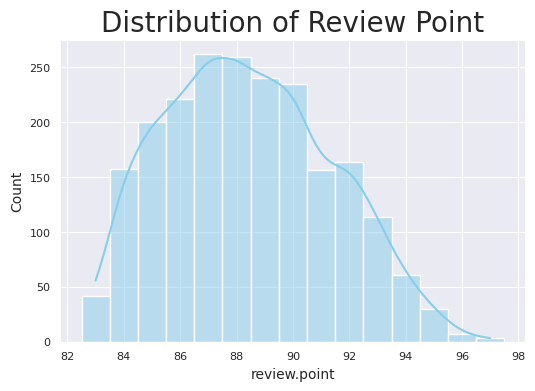

In [ ]:
g1 = sns.histplot(data=df, x="review.point",kde=True, discrete = True, color='skyblue')
g1.set_title("Distribution of Review Point",
                  fontsize=20)

#g1.fig.suptitle('Distribution of Whiskey Review Points')


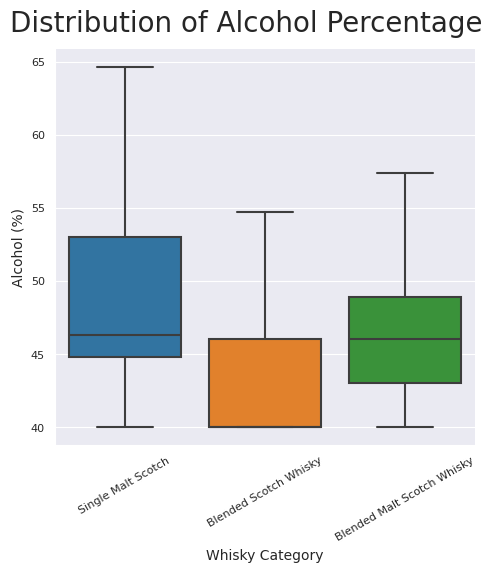

In [ ]:
sns.set_palette("tab10")

g2 = sns.catplot(x="category", y = 'alcohol', data=df,
            kind="box", sym = '', )
g2.fig.suptitle("Distribution of Alcohol Percentage",
                  fontsize=20, fontdict={"weight": "bold"})
g2.fig.subplots_adjust(top=0.9)
g2.set_xticklabels(rotation = 30)
g2.set(xlabel = 'Whisky Category', ylabel= 'Alcohol (%)')


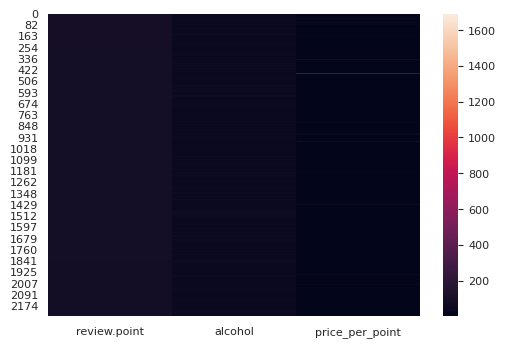

In [ ]:
df1 = df.drop(columns=['name', 'category', 'price', 'review_description'])
sns.heatmap(df1)

In [ ]:
# SweetViz for EDA
!pip install sweetviz

In [ ]:
# importing sweetviz
import sweetviz as sv
#analyzing the dataset
advert_report = sv.analyze(scotch_dataset)
#display the report
advert_report.show_html('Scotch_Dataset_sweetviz.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Scotch_Dataset_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


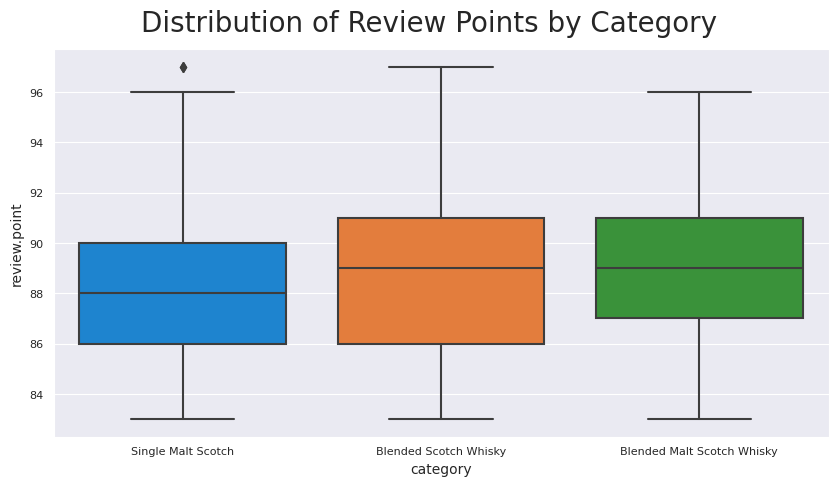

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
plt.suptitle("Distribution of Review Points by Category", fontsize=20, fontdict={"weight": "bold"})
plt.subplots_adjust(top=0.9)
plt.xlabel = 'Whisky Category'
plt.ylabel= 'Alcohol (%)'
sns.boxplot(x="category", y="review.point", data=scotch_dataset)

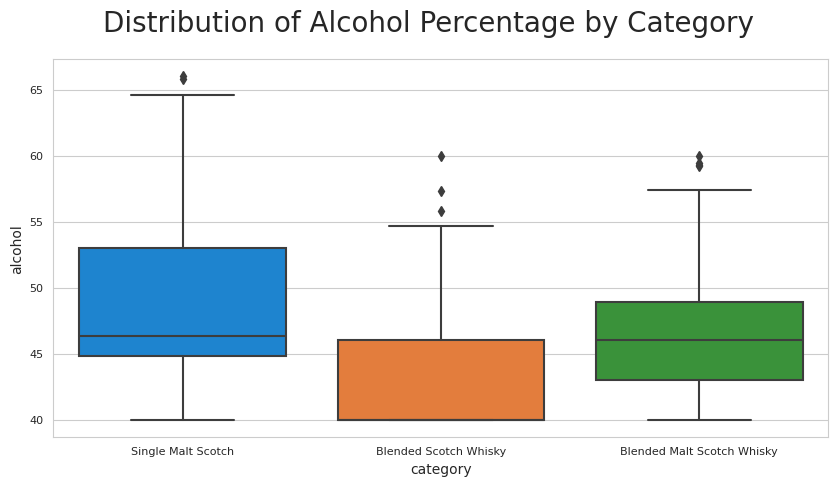

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
plt.suptitle("Distribution of Alcohol Percentage by Category", fontsize=20, fontdict={"weight": "bold"})
sns.boxplot(x="category", y="alcohol", data=scotch_dataset)

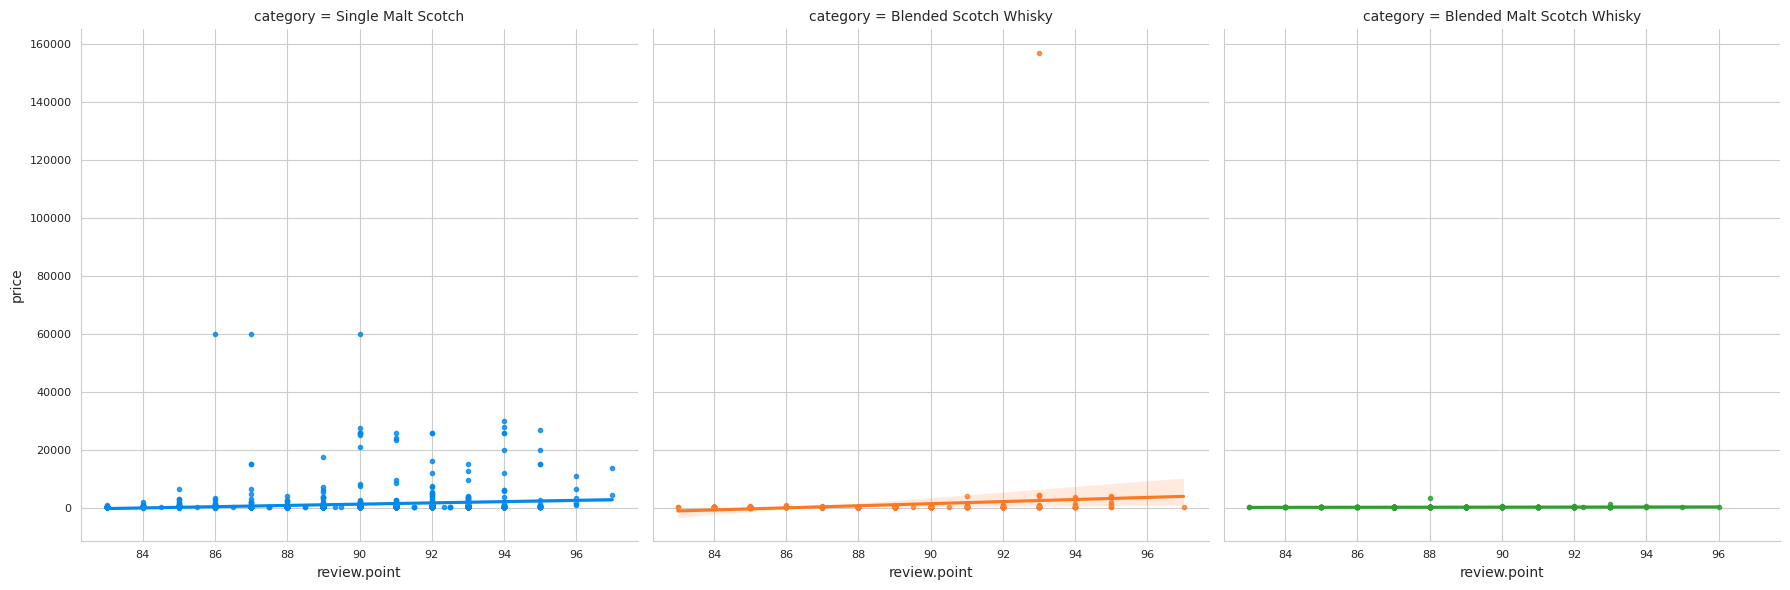

In [ ]:
sns.lmplot(x="review.point", y="price",  col="category",hue="category", data=scotch_dataset, height=6)

Rafikiel's EDA
Graph 1: Positive correlation between price and review point

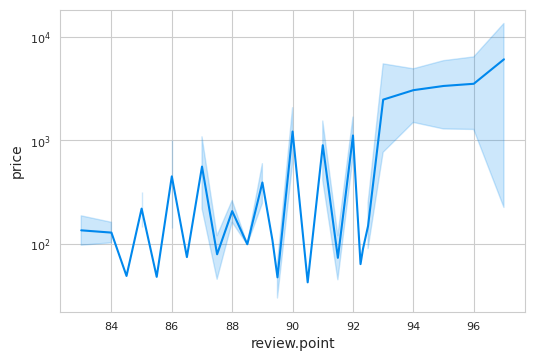

In [ ]:
p = scotch_dataset.groupby('price')
scotch_graph = scotch_dataset.query("category == 'Single Malt Scotch'")
g = sns.lineplot(x="review.point", y="price", data=scotch_dataset)
g.set_yscale("log")

Text(0.5, 1.0, 'Distribution of Review Points')

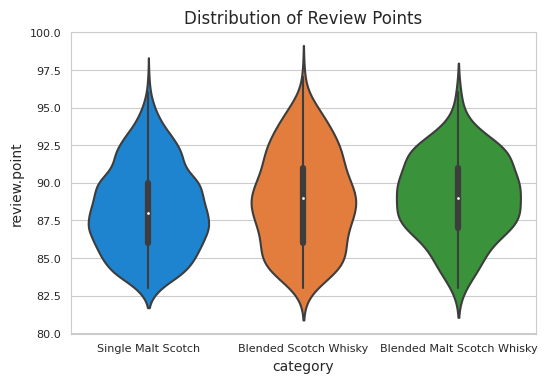

In [ ]:

v = sns.violinplot(x='category', y='review.point', data=scotch_dataset, pallete = 'Blues')
v.set_title('Distribution of Review Points')

### EDA - Description field.

In [ ]:
df.sample(2)

,name,category,review.point,price,review_description,alcohol,price_per_point
482,"Timorous Beastie 40 year old, 54.7%",Blended Malt Scotch Whisky,91.0,246.0,Non-chill filtered and matured exclusively in ...,54.7,2.703297
1600,"Glen Scotia 10 year old Peated, 50%",Single Malt Scotch,87.0,55.0,"And you shall be scotched: vanilla, fudge, era...",50.0,0.632184


In [ ]:
df_category_review = df.groupby('category').agg({'review_description': 'sum'}).reset_index()
df_category_review['text_length'] = df_category_review.review_description.str.split().str.len()
df_category_review

,category,review_description,text_length
0,Blended Malt Scotch Whisky,With a name inspired by a 1926 Buster Keaton m...,11402
1,Blended Scotch Whisky,"Magnificently powerful and intense. Caramels, ...",17154
2,Single Malt Scotch,What impresses me most is how this whisky evol...,124926


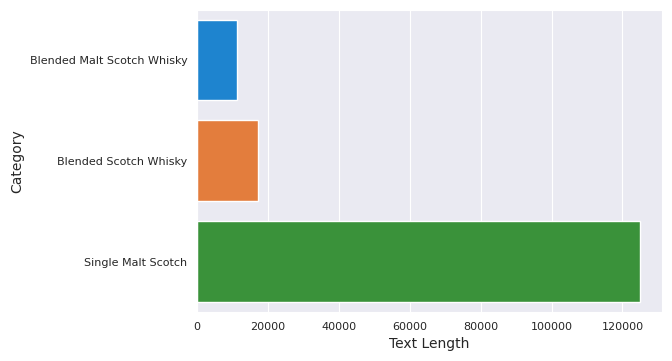

In [ ]:
sns.set_style('darkgrid')
ax = sns.barplot(y=df_category_review['category'], x=df_category_review['text_length'])
ax.set(xlabel='Text Length', ylabel='Category')
plt.show()

**Observation**:
Single Malt scotch has the highest review length, followed by Blended Scotch Whishkey and Blended Malt Scotch Whiskey.

In [ ]:
 !pip install wordcloud nltk

In [ ]:
from wordcloud import WordCloud
from PIL import Image
import requests

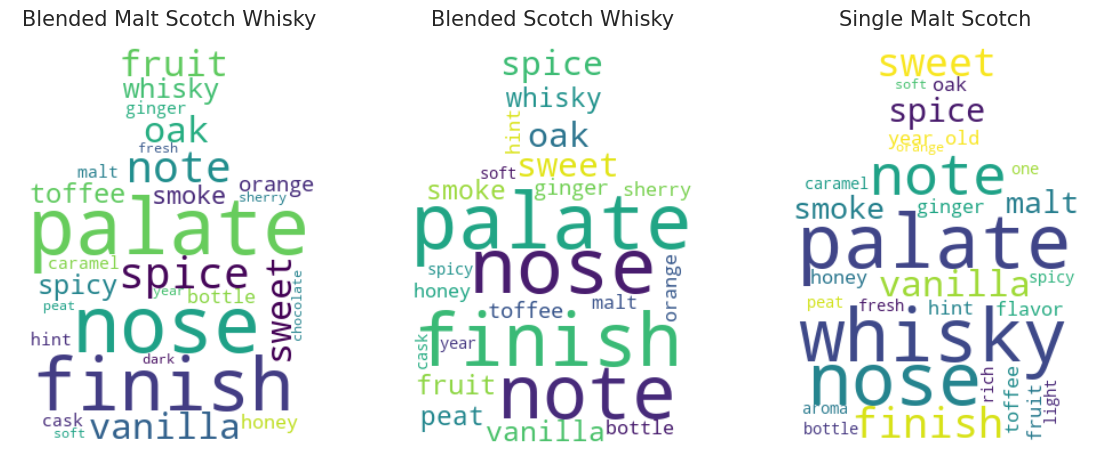

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[14, 14], facecolor = None)

x, y = np.ogrid[:300, :300]
mask = np.array(Image.open(requests.get('https://imgur.com/upL1TBW.png', stream = True).raw)) 

wc1 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc1.generate(df_category_review['review_description'][0])

ax1.axis("off")
ax1.imshow(wc1, interpolation="bilinear")
ax1.set_title(df_category_review['category'][0],fontsize=15)


wc2 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc2.generate(df_category_review['review_description'][1])

ax2.axis("off")
ax2.imshow(wc2, interpolation="bilinear")
ax2.set_title(df_category_review['category'][1],fontsize=15);


wc3 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc3.generate(df_category_review['review_description'][2])

ax3.axis("off")
ax3.imshow(wc3, interpolation="bilinear")
ax3.set_title(df_category_review['category'][2],fontsize=15)

plt.show()

**Observartion**: Most common words for each category.

# NLP (TfidfVectorizer) to make clusters

In [ ]:
df.sample(2)
df.shape

(2151, 7)

In [ ]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

snowball = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

In [ ]:
def tokenize(text):
    return [snowball.stem(word) for word in tokenizer.tokenize(text.lower())]

In [ ]:
tfidf = TfidfVectorizer(stop_words = 'english', tokenizer = tokenize)
idf = tfidf.fit_transform(df['review_description'])
idf = pd.DataFrame(idf.toarray(), columns=tfidf.get_feature_names_out())

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
idf.sample

<bound method NDFrame.sample of         '  abandon  abc  abdomen  ...  zinfandel  zing  zingi  zippi
0     0.0      0.0  0.0      0.0  ...        0.0   0.0    0.0    0.0
1     0.0      0.0  0.0      0.0  ...        0.0   0.0    0.0    0.0
2     0.0      0.0  0.0      0.0  ...        0.0   0.0    0.0    0.0
3     0.0      0.0  0.0      0.0  ...        0.0   0.0    0.0    0.0
4     0.0      0.0  0.0      0.0  ...        0.0   0.0    0.0    0.0
...   ...      ...  ...      ...  ...        ...   ...    ...    ...
2146  0.0      0.0  0.0      0.0  ...        0.0   0.0    0.0    0.0
2147  0.0      0.0  0.0      0.0  ...        0.0   0.0    0.0    0.0
2148  0.0      0.0  0.0      0.0  ...        0.0   0.0    0.0    0.0
2149  0.0      0.0  0.0      0.0  ...        0.0   0.0    0.0    0.0
2150  0.0      0.0  0.0      0.0  ...        0.0   0.0    0.0    0.0

[2151 rows x 5667 columns]>

In [ ]:
from umap import UMAP

In [ ]:
umap = UMAP(2)
u2 = umap.fit_transform(idf)

In [ ]:
u2df = pd.DataFrame(u2, columns=["e1", "e2"])
u2df.reset_index(inplace=True)

In [ ]:
clustering_dataset = df.copy()
clustering_dataset.reset_index(inplace=True)

In [ ]:
clustering_dataset["e1"] = u2df["e1"]
clustering_dataset["e2"] = u2df["e2"]

In [ ]:
clustering_dataset.shape

(2151, 10)

In [ ]:
clustering_dataset.drop(['review_description'], axis=1, inplace=True)

In [ ]:
clustering_dataset.dtypes

index                int64
name                object
category            object
review.point       float64
price              float64
alcohol            float64
price_per_point    float64
e1                 float32
e2                 float32
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder = LabelEncoder()
clustering_dataset['category'] = labelencoder.fit_transform(clustering_dataset['category'])
pd.DataFrame(OneHotEncoder().fit_transform(clustering_dataset[['category']]).toarray())
clustering_dataset

,index,name,category,review.point,price,alcohol,price_per_point,e1,e2
0,0,"Black Bowmore 42 year old 1964 vintage, 40.5%",2,97.0,4500.0,40.500000,46.391753,-3.673874,-3.416388
1,1,"Bowmore 46 year old (distilled 1964), 42.9%",2,97.0,13500.0,42.900000,139.175258,-5.544913,6.420865
2,2,"Johnnie Walker Blue Label, 40%",1,97.0,225.0,40.000000,2.319588,-8.015213,3.783497
3,3,"Glenlivet Cellar Collection 1969 vintage, 50.8%",2,96.0,750.0,50.800000,7.812500,4.738217,2.538945
4,4,The Macallan 29 year old 1976 Vintage (Cask #1...,2,96.0,1500.0,45.400000,15.625000,-8.586061,0.233448
...,...,...,...,...,...,...,...,...,...
2146,2242,"BenRiach Sauternes Wood Finish 16 year old, 46%",2,83.0,113.0,46.000000,1.361446,-11.995229,0.605519
2147,2243,The Macallan Whisky Maker,2,83.0,90.0,47.788622,1.084337,-6.555493,-2.923136
2148,2244,Arran St. Emilion Wine Cask Finish (Limited Ed...,2,83.0,80.0,50.000000,0.963855,-6.108206,-3.224880
2149,2245,"Smoking Ember, 40%",2,83.0,40.0,40.000000,0.481928,-10.015260,-5.751494


In [ ]:
clustering_dataset = clustering_dataset.set_index("name")

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
clust_data = sc.fit_transform(clustering_dataset)
X = pd.DataFrame(clust_data, index=clustering_dataset.index, columns=clustering_dataset.columns)

# NLP (SpaCy) to make clusters

In [ ]:
# installs
# ! pip install -U spacy 
# ! pip install -U textacy
# ! pip install newspaper3k
# ! pip install afinn

In [ ]:
!pip install colorama

In [ ]:
# imports
import spacy
from spacy import cli
from spacy import displacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.base import TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

import re
from tqdm import tqdm
from colorama import Fore, Back, Style

In [ ]:
df.sample(2)
df.shape

(2151, 7)

In [ ]:
text = df.review_description

In [ ]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

snowball = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')
def tokenize(text):
    return [snowball.stem(word) for word in tokenizer.tokenize(text.lower())]

In [ ]:
nlp = spacy.load('en')
def normalize_text(text):
    tm1 = re.sub('<pre>.*?</pre>', '', text, flags=re.DOTALL)
    tm2 = re.sub('<code>.*?</code>', '', tm1, flags=re.DOTALL)
    tm3 = re.sub('<[^>]+>©', '', tm1, flags=re.DOTALL)
    return tm3.replace("\n", "")

In [ ]:
# Removing code syntax from text 
df['review_description_cleaned'] = df['review_description'].apply(normalize_text)

In [ ]:
doc = nlp(df["review_description_cleaned"][3])

In [ ]:
review = str(" ".join([i.lemma_ for i in doc]))

In [ ]:
doc = nlp(review)
spacy.displacy.render(doc, style='ent', jupyter=True)

In [ ]:
# Part of Speech Tagging
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
punctuations = string.punctuation
stopwords = STOP_WORDS

In [ ]:
# POS tagging
for i in nlp(review):
    print(i, Fore.GREEN + "=>",i.pos_)

-PRON- => X
’ => PUNCT
great => ADJ
that => SCONJ
Glenlivet => PROPN
release => NOUN
whisky => NOUN
under => ADP
the => DET
' => PUNCT
Cellar => PROPN
Collection => PROPN
' => PUNCT
label => NOUN
. => PUNCT
-PRON- => PUNCT
really => ADV
show => VERB
the => DET
true => ADJ
potential => NOUN
of => ADP
Glenlivet => PROPN
. => PUNCT
this => DET
bottling => NOUN
be => AUX
classic => ADJ
ultra => ADV
- => ADJ
matured => ADJ
Glenlivet => PROPN
, => PUNCT
and => CCONJ
rival => VERB
the => DET
1959 => NUM
vintage => NOUN
Cellar => PROPN
Collection => PROPN
as => SCONJ
the => DET
good => ADJ
one => NOUN
ever => ADV
. => PUNCT
an => DET
incredibly => ADV
complex => ADJ
whisky => NOUN
, => PUNCT
with => ADP
note => NOUN
of => ADP
vanilla => NOUN
, => PUNCT
ripe => ADJ
barley => PROPN
, => PUNCT
coconut => PROPN
, => PUNCT
and => CCONJ
caramel => PROPN
. => PUNCT
all => DET
this => DET
be => AUX
accentuate => VERB
by => ADP
glaze => PROPN
orange => PROPN
, => PUNCT
hazelnut => PROPN
, => PUNCT
and 

In [ ]:
# Parser for reviews
parser = English()
def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

In [ ]:
!pip install tqdm

In [ ]:
tqdm.pandas()
df["processed_description"] = df["review_description_cleaned"].progress_apply(spacy_tokenizer)

100%|██████████| 2151/2151 [00:01<00:00, 1396.41it/s]


In [ ]:
# Topic Modeling
# Creating a vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
data_vectorized = vectorizer.fit_transform(df["processed_description"])
data_vectorized = pd.DataFrame(data_vectorized.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
data_vectorized.sample

<bound method NDFrame.sample of       aberdeenshire  aberfeldy  aberlour  abv  ...  zest  zesty  zing  zingy
0                 0          0         0    0  ...     0      0     0      0
1                 0          0         0    0  ...     0      0     0      0
2                 0          0         0    0  ...     0      0     0      0
3                 0          0         0    0  ...     0      0     0      0
4                 0          0         0    0  ...     0      0     0      0
...             ...        ...       ...  ...  ...   ...    ...   ...    ...
2146              0          0         0    0  ...     0      0     0      0
2147              0          0         0    0  ...     0      0     0      0
2148              0          0         0    0  ...     0      0     0      0
2149              0          0         0    0  ...     0      0     0      0
2150              0          0         0    0  ...     0      0     0      0

[2151 rows x 2178 columns]>

In [ ]:
from umap import UMAP

In [ ]:
umap = UMAP(2)
u2 = umap.fit_transform(data_vectorized)

In [ ]:
u2df = pd.DataFrame(u2, columns=["e1", "e2"])
u2df.reset_index(inplace=True)

In [ ]:
clustering_dataset = df.copy()
clustering_dataset.reset_index(inplace=True)

In [ ]:
clustering_dataset["e1"] = u2df["e1"]
clustering_dataset["e2"] = u2df["e2"]

In [ ]:
clustering_dataset.shape

(2151, 12)

In [ ]:
clustering_dataset.drop(['review_description'], axis=1, inplace=True)
clustering_dataset.drop(['review_description_cleaned'], axis=1, inplace=True)
clustering_dataset.drop(['processed_description'], axis=1, inplace=True)

In [ ]:
clustering_dataset.dtypes

index                int64
name                object
category            object
review.point       float64
price              float64
alcohol            float64
price_per_point    float64
e1                 float32
e2                 float32
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder = LabelEncoder()
clustering_dataset['category'] = labelencoder.fit_transform(clustering_dataset['category'])
pd.DataFrame(OneHotEncoder().fit_transform(clustering_dataset[['category']]).toarray())
clustering_dataset

,index,name,category,review.point,price,alcohol,price_per_point,e1,e2
0,0,"Black Bowmore 42 year old 1964 vintage, 40.5%",2,97.0,4500.0,40.500000,46.391753,0.233444,1.513388
1,1,"Bowmore 46 year old (distilled 1964), 42.9%",2,97.0,13500.0,42.900000,139.175258,-0.944987,-3.124998
2,2,"Johnnie Walker Blue Label, 40%",1,97.0,225.0,40.000000,2.319588,4.926933,-0.610755
3,3,"Glenlivet Cellar Collection 1969 vintage, 50.8%",2,96.0,750.0,50.800000,7.812500,0.292551,1.399706
4,4,The Macallan 29 year old 1976 Vintage (Cask #1...,2,96.0,1500.0,45.400000,15.625000,10.984725,-2.005265
...,...,...,...,...,...,...,...,...,...
2146,2242,"BenRiach Sauternes Wood Finish 16 year old, 46%",2,83.0,113.0,46.000000,1.361446,6.367056,2.362271
2147,2243,The Macallan Whisky Maker,2,83.0,90.0,47.788622,1.084337,-11.603150,2.353169
2148,2244,Arran St. Emilion Wine Cask Finish (Limited Ed...,2,83.0,80.0,50.000000,0.963855,-0.679902,1.054483
2149,2245,"Smoking Ember, 40%",2,83.0,40.0,40.000000,0.481928,-0.758888,1.036185


In [ ]:
clustering_dataset = clustering_dataset.set_index("name")

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
clust_data = sc.fit_transform(clustering_dataset)
X = pd.DataFrame(clust_data, index=clustering_dataset.index, columns=clustering_dataset.columns)

# K-Mean

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

inertia = []
silhouette = []
for i in range(2,10):
    kmeans = KMeans(i, random_state=820)
    kmeans.fit(X)
    kmeans_lab = kmeans.predict(X)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X, kmeans_lab))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


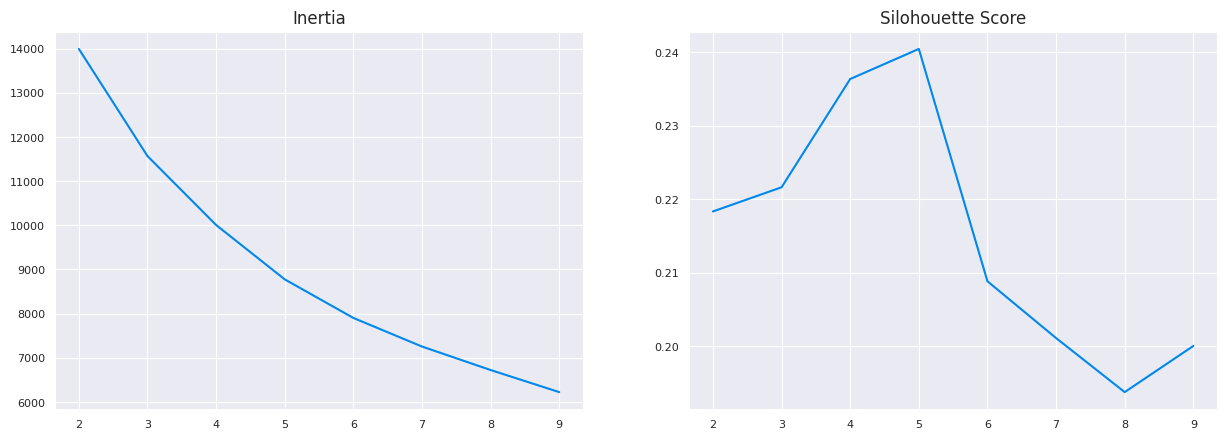

In [ ]:
plt.figure(figsize=(15,5))


plt.subplot(1, 2, 1)
plt.title("Inertia")
sns.lineplot(range(2,10), inertia)

plt.subplot(1, 2, 2)
plt.title("Silohouette Score")
sns.lineplot(range(2,10), silhouette)

plt.show()

In [ ]:
k = KMeans(5, random_state=820)
k.fit(X)
k_labs = k.predict(X)
df["kmean_cluster"] = k_labs

In [ ]:
df['kmean_cluster'].value_counts()

0    970
4    830
2    321
3     29
1      1
Name: kmean_cluster, dtype: int64

In [ ]:
profile = df.groupby('kmean_cluster').mean()
profile

,review.point,price,alcohol,price_per_point
kmean_cluster,,,,
0,85.923196,195.218041,47.032961,2.268424
1,93.000000,157000.000000,42.500000,1688.172043
2,89.636293,220.592679,44.728660,2.416333
3,91.551724,26025.344828,47.824138,286.414695
4,90.764659,597.418474,49.860307,6.511934


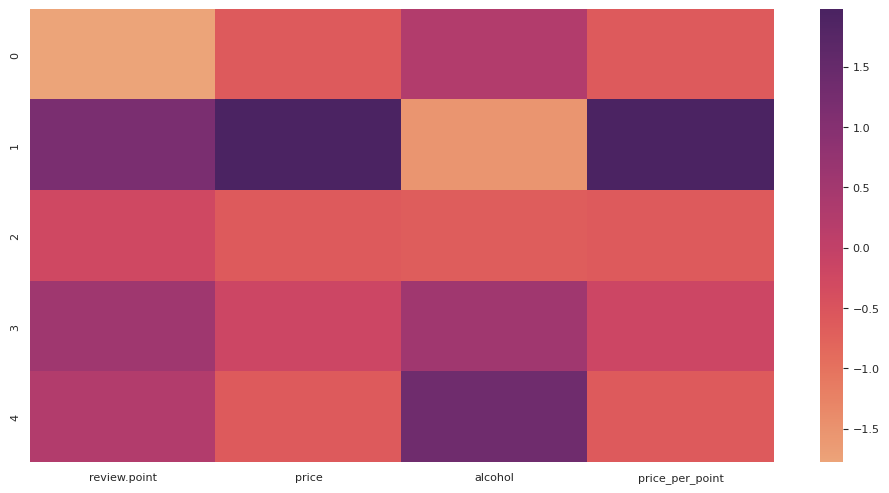

In [ ]:
# heatmap
sc = StandardScaler()
profile_scaled = sc.fit_transform(profile)

plt.figure(figsize=(12, 6))
pal = sns.color_palette("flare", as_cmap=True)
sns.heatmap(profile_scaled, center=0, cmap=pal, xticklabels=profile.columns)

# Classification Prediction Model

## XGBoost with hyperparameter tuning

In [ ]:
df.sample(3)

,name,category,review.point,price,review_description,alcohol,price_per_point,review_description_cleaned,processed_description,kmean_cluster
413,"Glenrothes, 1987 vintage, 43%",Single Malt Scotch,91.0,100.0,I feel this is by far the best whisky in the s...,43.0,1.098901,I feel this is by far the best whisky in the s...,feel far best whisky standard auchentoshan por...,4
2232,Whisky Galore (distilled at Old Pulteney) 16 y...,Single Malt Scotch,83.0,70.0,"Benachie, formerly known as Jericho, was an Ab...",46.0,0.843373,"Benachie, formerly known as Jericho, was an Ab...",benachie known jericho aberdeenshire distiller...,0
1253,Bunnahabhain Pedro Ximénez Cask Finish 15 year...,Single Malt Scotch,88.0,99.0,"Heavily peated Bunnahabhain spirit, referred t...",54.3,1.125000,"Heavily peated Bunnahabhain spirit, referred t...",heavily peated bunnahabhain spirit referred ma...,0


In [ ]:
model_dataset = df.drop(['name'], axis=1)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from category_encoders import OrdinalEncoder
from sklearn.pipeline import Pipeline

steps = [("encoding", OrdinalEncoder()), 
         ('model', xgb.XGBClassifier())]

pipe = Pipeline(steps)

param_grid = {
    'model__max_depth': [2, 3, 5, 7, 10],
    'model__n_estimators': [10, 100, 500],
}

grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

In [ ]:
X = model_dataset.drop('kmean_cluster', axis=1)  
y = model_dataset['kmean_cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=8)

In [ ]:
grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoding', OrdinalEncoder()),
                                       ('model', XGBClassifier())]),
             n_jobs=-1,
             param_grid={'model__max_depth': [2, 3, 5, 7, 10],
                         'model__n_estimators': [10, 100, 500]},
             scoring='accuracy')

In [ ]:
y_hat = grid.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_hat, y_test)
accuracy

0.9859154929577465